# Başlık: Tarım Yapılacak Alanın Özelliklerine Göre Mahsul Önerisi 

Hazırlayanlar: 

**20010011033 Erdem Demirci**

**21100011014 Erdem Lale**



# Araştırma sorularına ve sonuçlarına genel bakış:

**Bu veri analizi projesini hangi amaçla gerçekleştiriyorsunuz?**

Bu veri analizi projesinin amacı tarım alanı hakkında  çeşitli parametrelere göre o alanda yetişebilecek en uygun mahsulü önermektir.


**Neyi hesaplamaya çalışıyorsunuz ve neden?**

Bu veri analizinde topraktaki azot miktarını, fosfor miktarını, potasyum miktarını, ph değerini ve havanın bağıl nem oranını, sıcaklık değerini ve yağış miktarını kullanarak hesaplamalar yapmaktayız. Bu hesaplama ile çiftçilere maksimum verim ve kar için çiftliklerinde yetiştirebilecekleri en uygun mahsulü önermekteyiz. 

**1-) Veri setinin hangi niteliklerinde eksik veri var ve en çok eksik veri hangi nitelikte ?**
N, P, K, temperature, humidity, ph ve rainfall niteliklerinde eksik veri gözlemmiştir. En çok eksik veri N niteliğindedir.

**2-) Nitelik bakımından aykırı olarak gözüken veriler, sınıfların kendi içindeki niteliklerde de aykırı olarak mı gözükür?**
Nitelik bakımından P, K, temperature, humidity, ph ve rainfal aykırı veriler gözlenmekte ama Sınıfların kendi içindeki niteliklerde aykırı değere rastlanmamaktadır.

**3-) Orjinal veri seti ile sonradan eksik veri oluşturulup doldurulan veri setinin doğruluk değerleri nasıldır, hangisinin doğruluk değeri daha büyük çıkmıştır ve neden?**
İki veri setinde de aynı algoritma uygulanmıştır.Orijjinal veri setinde doğruluk değeri 0.990909090909091 olarak bulunmuştur.Eksik veri oluşturulup doldurulan veri setinde doğruluk değeri 0.9931818181818182'dur.
Bu sonuçlar bize doldurulan değerlerin veri setinin normal dağılımına daha yakınlaşmış olduğunu göstermektedir. Bu sebeple işlenmiş veri seti ile daha yüksek doğruluk elde etmektedir.

# Motivasyon ve arka plan:

Günümüz tarım alanında verimli toprak alanlarının azalması ve hava koşullarının değişmesi gibi nedenlerden dolayı verimli ürün yetiştirmek oldukça zorlaştı. Veri analizimizin amacı çeşitli parametrelere dayalı olarak çiftçilere yetiştirilecek en uygun mahsulleri tavsiye etmek ve ekimden önce bilinçli bir karar vermelerine yardımcı olmaktır. Verimli ürün yetiştirmek ürün kaybını ve bundan kaynaklı oluşabilecek kıtlığı engellemek açısından önemlidir. Şu an var olan tarım krizini de önlemek açısından çiftçilere bilinçli karar vermeleri için yardımcı olmaktadır.

# Veri kümesi ile ilgili bilgiler:

Bu veri seti, Hindistan için mevcut olan yağış, iklim ve gübre verilerinin veri kümelerini artırarak oluşturulmuştur. Veri Seti Öznitelikleri:
- N: Topraktaki Azot içeriğinin oranı
- P: Topraktaki fosfor içeriğinin oranı
- K: Topraktaki Potasyum içeriğinin oranı
- temperature: Santigrat derece sıcaklık
- humidity: % cinsinden bağıl nem %
- ph: toprağın ph değeri
- rainfall: mm cinsinden yağış

# Metadoloji

**1-) Veri Setinin İncelenmesi**

**Veri Setinin linki =** https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset 

Kullanmış olduğumuz bu veri setinde eksik veri bulunmamaktadır. Bu sebeple sentetik olarak kendimiz boş değerler oluşturduk. Bunu yapmak için aşağıdaki kodu kullandık:

import pandas as pd

import numpy as np

file_path = "C:/Users/Erdem/OneDrive/Masaüstü/Crop_recommendation.csv"

data = pd.read_csv(file_path)

synthetic_data = data.copy()
missing_percentage = 0.1

for column in synthetic_data.columns:

    if column != 'label':
    
        num_missing_values = np.random.randint(1, len(synthetic_data) * missing_percentage)
        missing_indices = np.random.choice(synthetic_data.index, size=num_missing_values, replace=False)
        synthetic_data.loc[missing_indices, column] = np.nan

output_file_path = "C:/Users/Erdem/OneDrive/Masaüstü/eksikverili_Crop_recommendation.csv"
synthetic_data.to_csv(output_file_path, index=False)

**2-) Eksik Verilerin İşlenmesi**

Veri setinde bulunan boş değerleri doldurmak için K-NN algoritması kullanıldı. Bu işlem yapılırken aykırı değer oluşmaması adına boşluk değerlerine kendi sınıfları içinde uygulanmıştır.

**3-) Aykırı Değerlerin İşlenmesi**

Veri setinin orjinal halinde aykırı değer bulunmamaktadır. Boş değer oluşturup doldurma işlemlerinden sonrada oluşmamıştır.

**4-) Özellik Seçimi**

"sklearn.model_selection" kütüphanesi içinde bulunan "train_test_split" fonksiyonu kullanarak özellik seçimi yapılmıştır.

**5-) Kullanılan Algroitmalar**

Veri seti için Karar Ağacı, Random Forest, K-NN ve Naive Bayes algoritmaları kullanılmıştır. Hiper parametre seçimi için GridSearchCv kullanılmıştır.

# Sonuçlar

Son oluşan modellerin doğruluk değerleri:

- Karar Ağacı : 9022727272727272
- Random Forest : 0.990909090909091
- K-NN : 0.9772727272727273
- Naive Bayes : 0.9931818181818182

Bu sonuçlara göre bu veri seti için en uygun algoritma Naive Bayes algritmasıdır.

# Veri Setine Ait Tanımlayıcı Bilgiler

**Gerekli Kütüphanelerin Eklenmesi**

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as sm
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


**Veri setinin okunması.**

In [2]:
df = pd.read_csv("VA_20_033_21_014VeriSetiEksik.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


**Toplam hücre sayısı**

In [3]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,NaN,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,NaN,34.0,26.272418,52.127394,6.758793,127.175293,coffee
2199,104.0,18.0,30.0,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2029.000000,2160.000000,2184.000000,2074.000000,2152.000000,2119.000000,2054.000000
mean,50.611631,53.281944,48.104396,25.584943,71.506417,6.470067,103.247782
std,36.909800,32.915582,50.599721,5.041907,22.237980,0.772469,54.835564
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.360011
25%,21.000000,28.000000,20.000000,22.784864,60.261953,5.972052,64.561136
50%,37.000000,51.000000,32.000000,25.599295,80.483245,6.423217,94.772563
75%,85.000000,68.000000,49.000000,28.559488,89.930455,6.923776,123.636582
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.size

17600

**Satır ve sütun bilgisi**

In [6]:
df.shape

(2200, 8)

**Kolon Başlıkları**

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

**Sınıflar (Mahsuller)**

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

**Niteliklerin Tipleri**

In [9]:
df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

**Sınıf Adetleri**

In [10]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

**Pasta grafiği şeklinde gösterim**

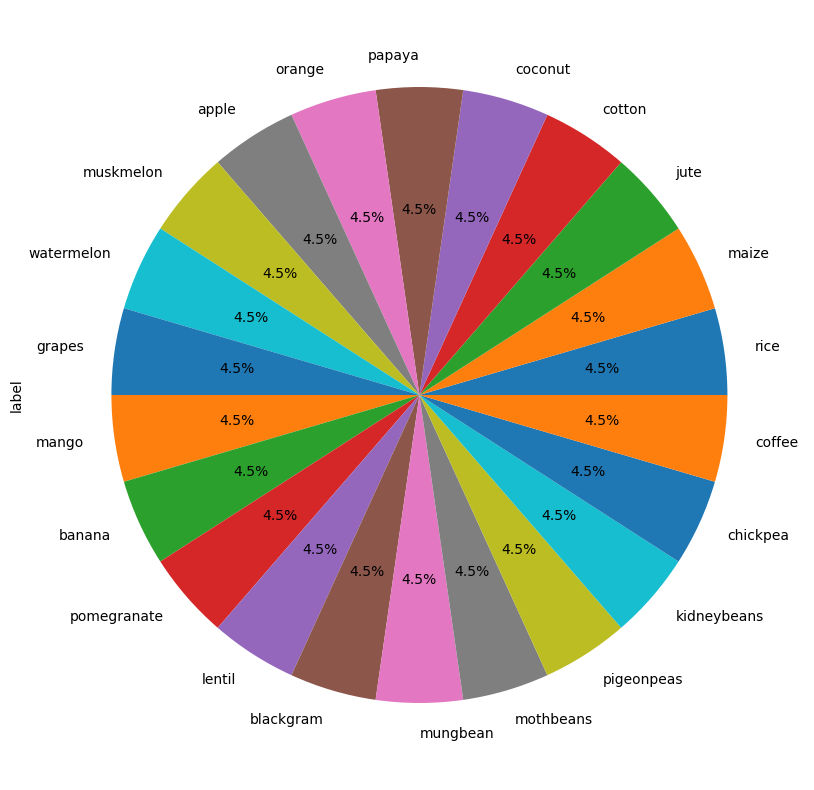

In [11]:
plt.figure(figsize=(10,10))
df['label'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

**Niteliklerin birbiri ile olan ilişkilerinin Heatmap ile gösterimi**

<AxesSubplot:>

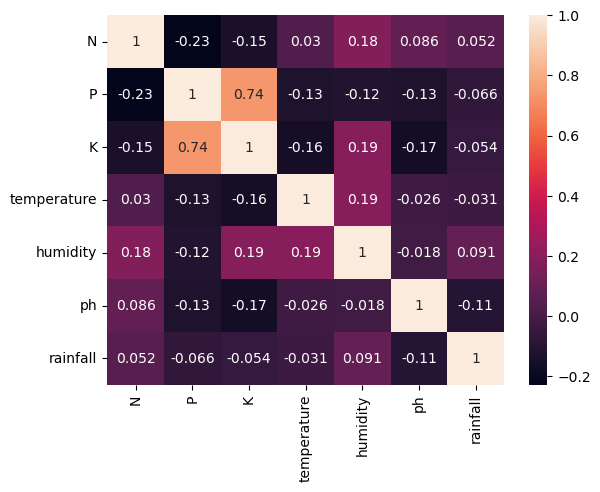

In [12]:
numeric_df = df.select_dtypes(include=['float64', 'int64']) #sayısal olmayan verilerin kaldırılması
sns.heatmap(numeric_df.corr(), annot=True)

**Niteliklerin histogram grafiği ile analizi**

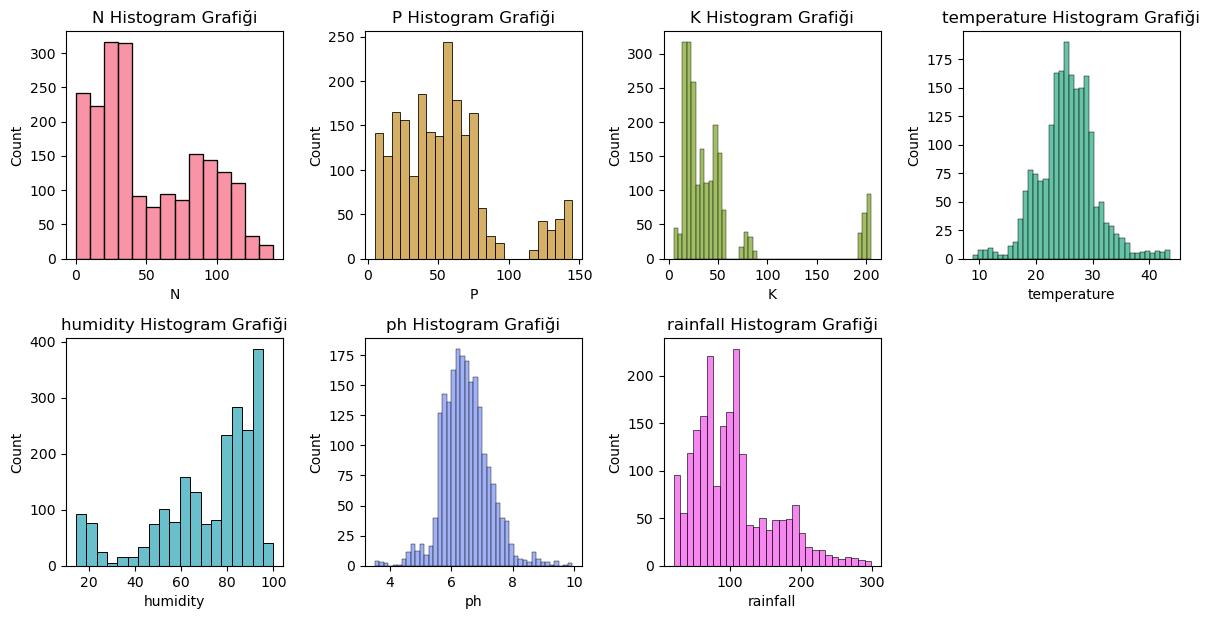

In [13]:
plt.figure(figsize=(12, 12))

colors = sns.color_palette('husl', len(df.columns[:-1]))

for i, (col, color) in enumerate(zip(df.columns[:-1], colors), 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], color=color)
    plt.title(str(col) + " Histogram Grafiği")

plt.tight_layout()
plt.show()

# Eksik Verilerin Analizi ve Veri Ön İşleme

**Eksik verilerin adetleri**

In [14]:
df.isnull().sum()

N              171
P               40
K               16
temperature    126
humidity        48
ph              81
rainfall       146
label            0
dtype: int64

<AxesSubplot:>

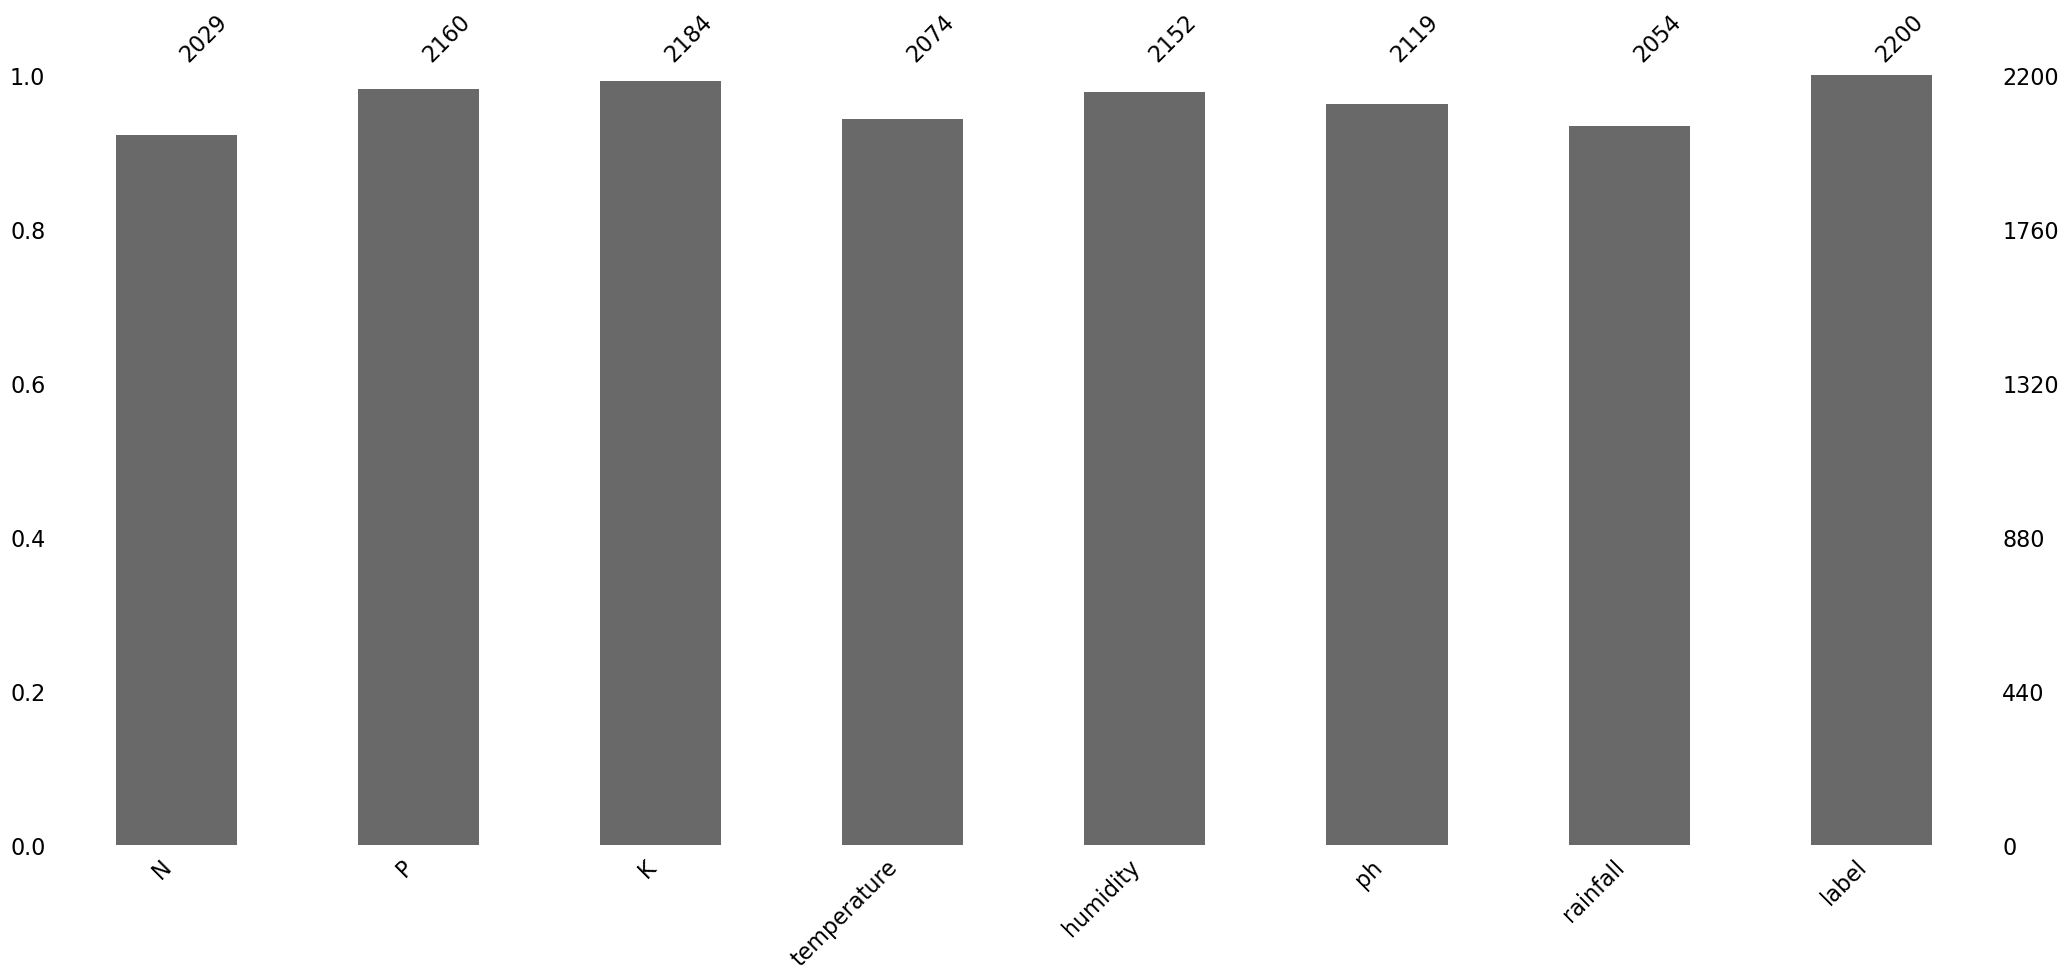

In [15]:
msno.bar(df)

<AxesSubplot:>

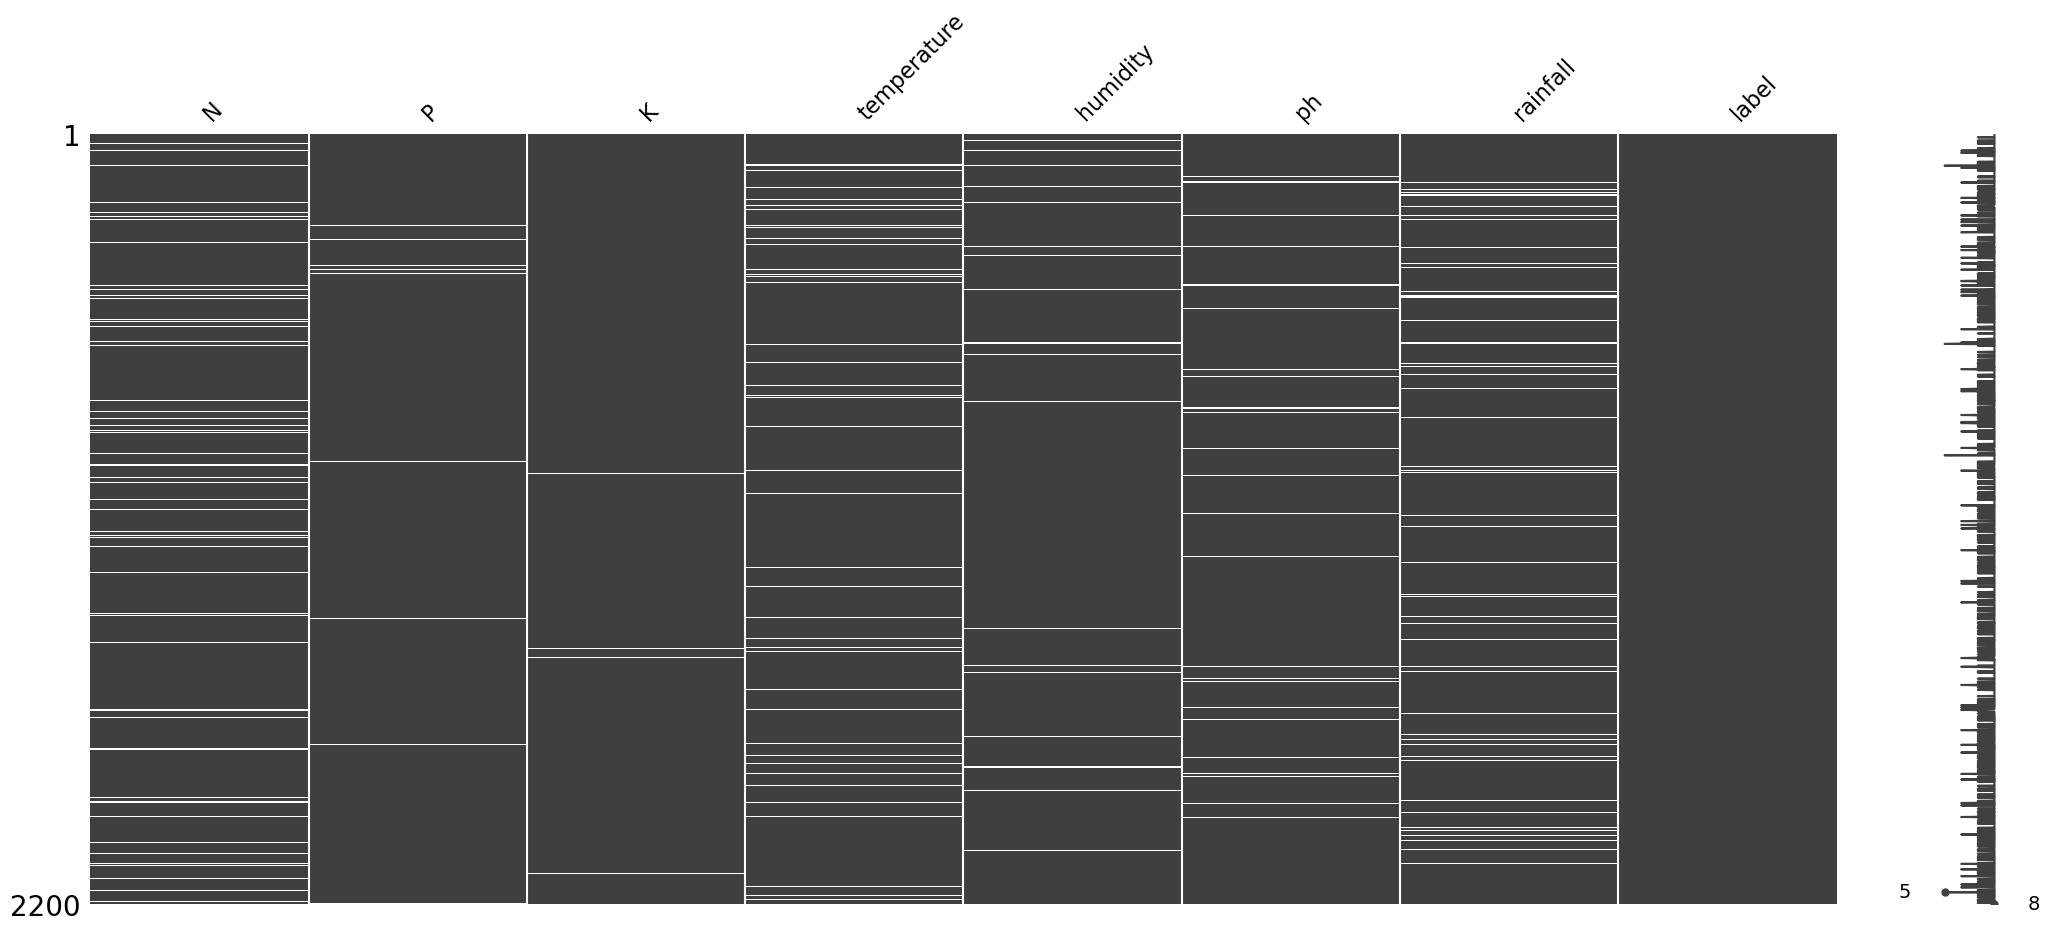

In [16]:
msno.matrix(df)

In [17]:
class_labels = df['label'].unique().tolist()
class_labels

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [18]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [19]:
class_labels = le.classes_
class_labels

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

**Sınıf isimlerinin sayısal değere dönüştürülmesi**

In [20]:
label_dict = {}
for index,label in enumerate(class_labels):
    label_dict[index] = label
    
print(label_dict)

{0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}


**K-NN Algoritması kullanarak eksik değerleri doldurma**

In [21]:
from sklearn.impute import KNNImputer

# Boş verileri doldurmak için KNNImputer'ı kullanarak her bir sınıf için işlem yapın
imputed_dfs = []

# Sınıfların listesini alalım
classes = df['label'].unique()

for class_label in classes:
    # Belirli bir sınıfa ait örnekleri seçelim
    class_data = df[df['label'] == class_label].drop(columns=['label'])
    
    # KNNImputer'ı oluşturalım ve uygulayalım
    imputer = KNNImputer(n_neighbors=5)
    imputed_data = imputer.fit_transform(class_data)
    
    # Eksik değerleri doldurulmuş veri çerçevesini oluşturalım
    imputed_df = pd.DataFrame(imputed_data, columns=class_data.columns)
    
    # Etiket sütununu geri ekleyelim
    imputed_df['label'] = class_label
    
    # İşlenmiş veri çerçevesini listeye ekleyelim
    imputed_dfs.append(imputed_df)

# Tüm işlenmiş veri çerçevelerini birleştirelim
merged_df = pd.concat(imputed_dfs, ignore_index=True)

# Birleştirilmiş veri çerçevesini görüntüleyelim
print(merged_df.head())




      N     P     K  temperature   humidity        ph    rainfall  label
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536     20
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537     20
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248     20
3  74.0  35.0  40.0    26.491096  80.158363  6.980401  242.864034     20
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340     20


In [22]:
merged_df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,20
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,5
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,5
2197,107.2,33.0,30.0,24.131797,67.225123,6.362608,173.322839,5
2198,117.0,30.2,34.0,26.272418,52.127394,6.758793,127.175293,5


# Normalizasyon

**Veri setine MinMax ölçeklendirilmesi yapıldı.**

In [23]:
from sklearn.preprocessing import MinMaxScaler
data = merged_df.copy()
data_numeric = data.drop(columns=['label'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numeric)
data_scaled_df = pd.DataFrame(data_scaled, columns=data_numeric.columns)
data_scaled_df['label'] = data['label']

imputed_df = data_scaled_df.copy()

In [24]:
imputed_df.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.360014,0.345308,0.215780,0.481464,0.667602,0.460940,0.298513,10.500000
std,0.262723,0.235451,0.253253,0.143505,0.259610,0.118988,0.196720,6.345731
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.148929,0.164286,0.075000,0.400689,0.535916,0.383796,0.158955,5.000000
50%,0.264286,0.328571,0.135000,0.481888,0.772687,0.454025,0.268824,10.500000
75%,0.600000,0.450000,0.220000,0.566434,0.882960,0.531216,0.374713,16.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


# Aykırı Değer Analizi ve Veri Ön İşleme


**Aykırı değer tespiti**

Box-plot ile gösterim


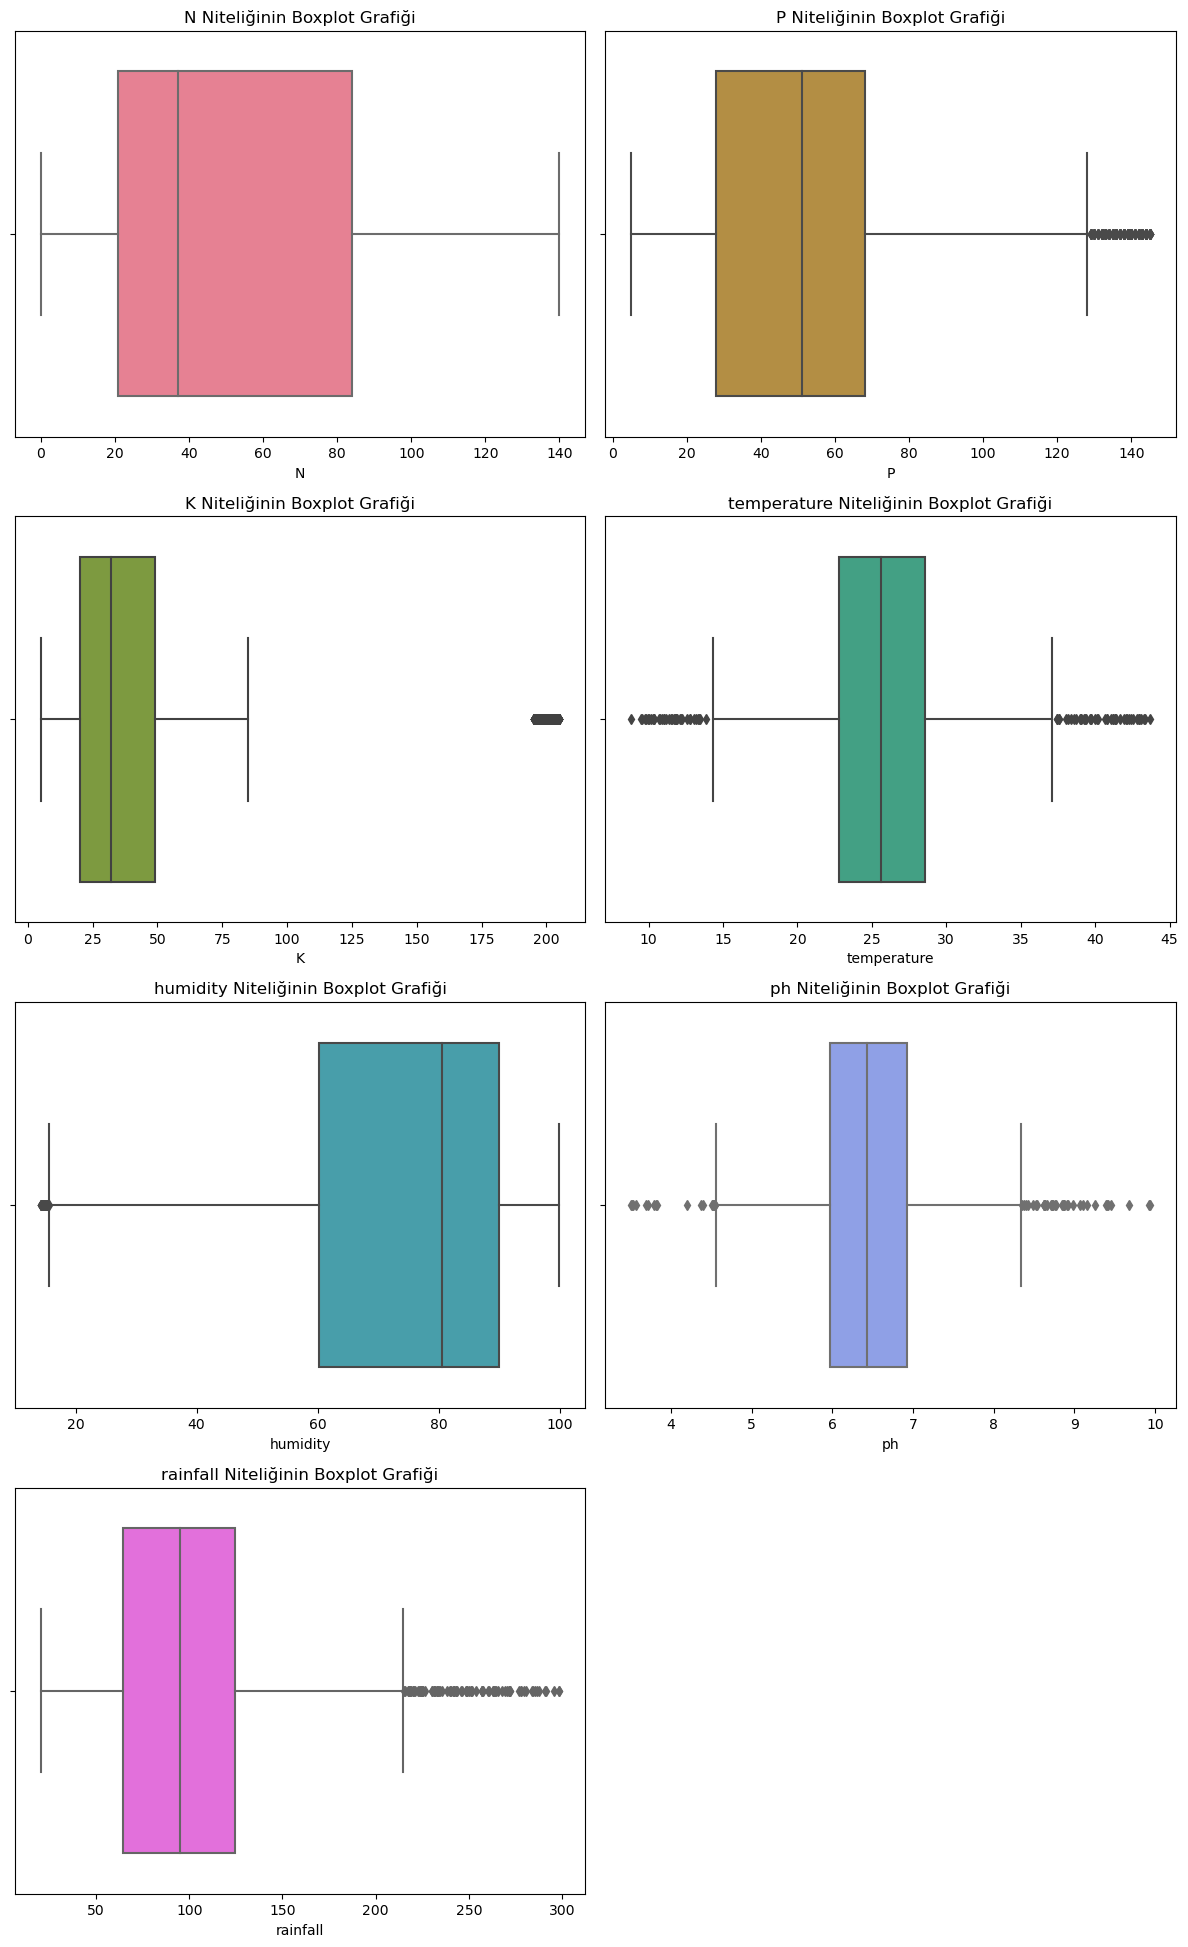

In [25]:
plt.figure(figsize=(12, 24))

colors = sns.color_palette('husl', len(df.columns[:-1]))

for i, (col, color) in enumerate(zip(df.columns[:-1], colors), 1):
    plt.subplot(5, 2, i)
    sns.boxplot(merged_df[col], color=color)
    plt.title(str(col) + " Niteliğinin Boxplot Grafiği")

plt.tight_layout()
plt.show()

**SInıfların Kendi İçlerinde Aykırı Değer Analizinin Yapılması**

<Figure size 2400x1200 with 0 Axes>

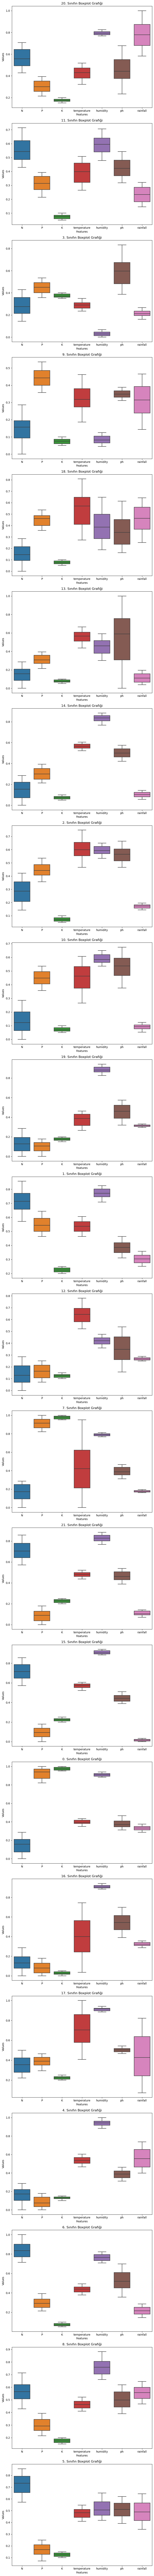

In [26]:
# Sınıfların listesini alalım
classes = imputed_df['label'].unique()

# Her bir sınıfa ait veriye görselleştirmeyi uygulayalım
plt.figure(figsize=(24, 12))

num_plots = len(classes)
e = 1
fig, axes = plt.subplots(num_plots, e, figsize=(8, 6*num_plots))

for i, class_label in enumerate(classes):
    # Belirli bir sınıfa ait örnekleri seçelim
    class_data = imputed_df[imputed_df['label'] == class_label].drop(columns=['label'])

    # Belirli bir sınıfa ait veriyi görselleştirelim
    sns.boxplot(data=class_data, ax=axes[i])
    axes[i].set_title(f'{class_label}. Sınıfın Boxplot Grafiği')
    axes[i].set_xlabel('Features')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

**Görüldüğü üzere sınıfların kendi içlerinde aykırı değer bulunmamakadır.**

# Özellik Seçimi


In [27]:
features = imputed_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = imputed_df['label']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

In [29]:
acc = [] # algoritmaların doğruluk değerlerini tutmak için bir dizi
model = [] # algoritmaların modellerini tutmak için bir dizi

# Karar Ağacı


In [30]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  90.22727272727272
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.59      1.00      0.74        16
           3       1.00      1.00      1.00        21
           4       0.91      1.00      0.95        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.76      0.93      0.84        28
           9       0.00      0.00      0.00        14
          10       0.68      1.00      0.81        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.00      0.00      0.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00

In [31]:
#Cross Validation Skoru hesaplandı
from sklearn.model_selection import cross_val_score
score = cross_val_score(DT, features, target,cv=5)
print('Cross validation skoru: ',score)

Cross validation skoru:  [0.94090909 0.91363636 0.92045455 0.87727273 0.94090909]


In [32]:
#Eğitimin doğruluk değeri yazdırıldı
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Testin doğruluk değeri yazdırıldı
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))


Training accuracy =  0.8823863636363637
Testing accuracy =  0.9022727272727272


# Random Forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      0.96      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00  

In [34]:
#Cross Validation Skoru hesaplandı
score = cross_val_score(RF,features,target,cv=5)
print('Cross validation skoru: ',score)

Cross validation skoru:  [0.99772727 0.99772727 0.99545455 0.99090909 0.99090909]


In [35]:
#Eğitimin doğruluk değeri yazdırıldı
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Testin doğruluk değeri yazdırıldı
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.990909090909091


# K-NN Algoritması

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        18
           8       0.90      0.93      0.91        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      0.90      0.95        21
          12       0.96      1.00      0.98        26
          13       1.00      0.84      0.91        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00 

In [37]:
#Cross Validation Skoru hesaplandı
score = cross_val_score(knn,features,target,cv=5)
print('Cross validation skoru: ',score)

Cross validation skoru:  [0.97954545 0.98181818 0.98181818 0.98863636 0.98181818]


In [38]:
#Eğitimin doğruluk değeri yazdırıldı
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Testin doğruluk değeri yazdırıldı
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

knn_train_accuracy =  0.990909090909091
knn_test_accuracy =  0.9772727272727273


# Hiper Parametre Ayarlaması

K-NN algoritmasındaki zorluklardan biri, algoritmanın en verimli çalışacak 'k' değerini yani komşu sayısını bulmaktır. Genel olarak modelin doğruluğunu farklı k değerleri için test etmek ve ardından bunlardan en iyisini seçmek gerekmektedir.

In [39]:
# 1 den 20 ye kadar k değerlerini hesaplama
mean_acc = np.zeros(20)
for i in range(1,21):
    # Modeli eğitme ve tahmin yapma
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.97045455, 0.96818182, 0.975     , 0.97045455, 0.97727273,
       0.97045455, 0.98181818, 0.97954545, 0.97954545, 0.97954545,
       0.98181818, 0.97727273, 0.97727273, 0.97727273, 0.97727273,
       0.975     , 0.97272727, 0.97045455, 0.97045455, 0.96590909])

**Grafikte Gösterim**

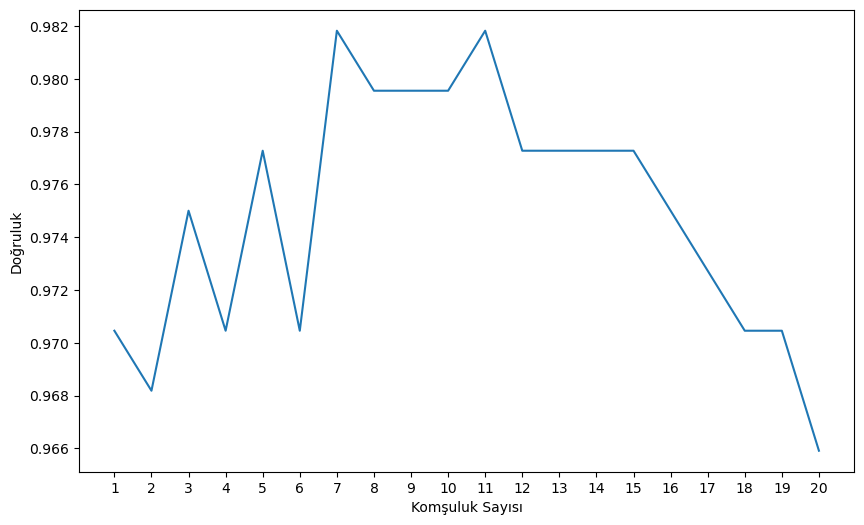

In [40]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Komşuluk Sayısı')
plt.ylabel('Doğruluk')
plt.show()

Grafikte görüldüğü üzere hiperparatme için 7,11 ve 12 değerleri en uygun gözükmektedir.

# GridSearchCv Kullanımı


In [41]:
grid_params = { 'n_neighbors' : [6,7,8,9,10,11,12,13,14,15,16,17,18],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [42]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [43]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 78 candidates, totalling 234 fits


In [44]:
g_res.best_score_

0.9835204555277118

In [45]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}

GridSearchCv fonksiyonuna göre ise en uygun k değeri 13 olarak çıkmaktadır.

In [46]:
#Yeni bulunan Hiper parametreyi ayarlayarak son model oluşturma
knn_1 = KNeighborsClassifier(n_neighbors = 13, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn_1.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=13,
                     weights='distance')

In [47]:
# Train ve Test Doğrulukları yeni hiper parametreye göre yeniden hesaplandı
knn_train_accuracy = knn_1.score(x_train,y_train)
print("knn_train_accuracy = ",knn_1.score(x_train,y_train))

knn_test_accuracy = knn_1.score(x_test,y_test)
print("knn_test_accuracy = ",knn_1.score(x_test,y_test))

knn_train_accuracy =  1.0
knn_test_accuracy =  0.9863636363636363


# Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Doğruluk Oranı: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Doğruluk Oranı:  0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00

In [49]:
#Cross Validation Skoru hesaplandı
score = cross_val_score(NaiveBayes,features,target,cv=5)
print('Cross validation skoru: ',score)

Cross validation skoru:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99545455]


In [50]:
#Eğitimin doğruluk değeri yazdırıldı
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Testin doğruluk değeri yazdırıldı
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9965909090909091
Testing accuracy =  0.9931818181818182


# Algoritmaların Son Modellerine Göre Doğruluklarının Karşılaştırılması

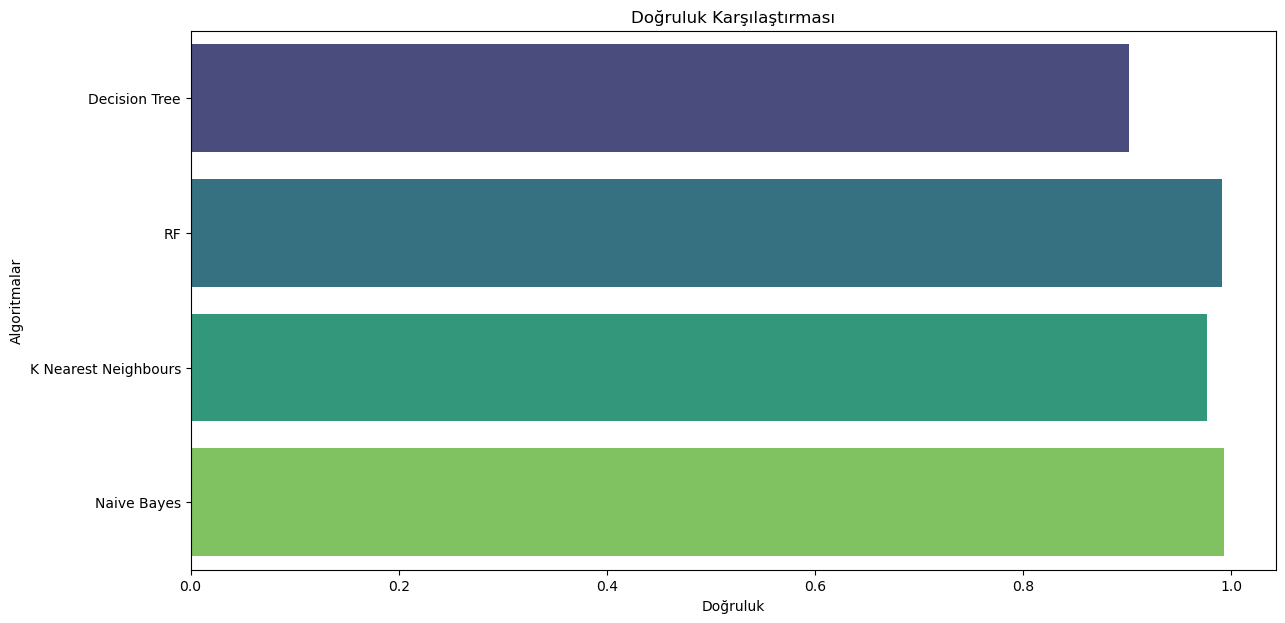

In [51]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Doğruluk Karşılaştırması')
plt.xlabel('Doğruluk')
plt.ylabel('Algoritmalar')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

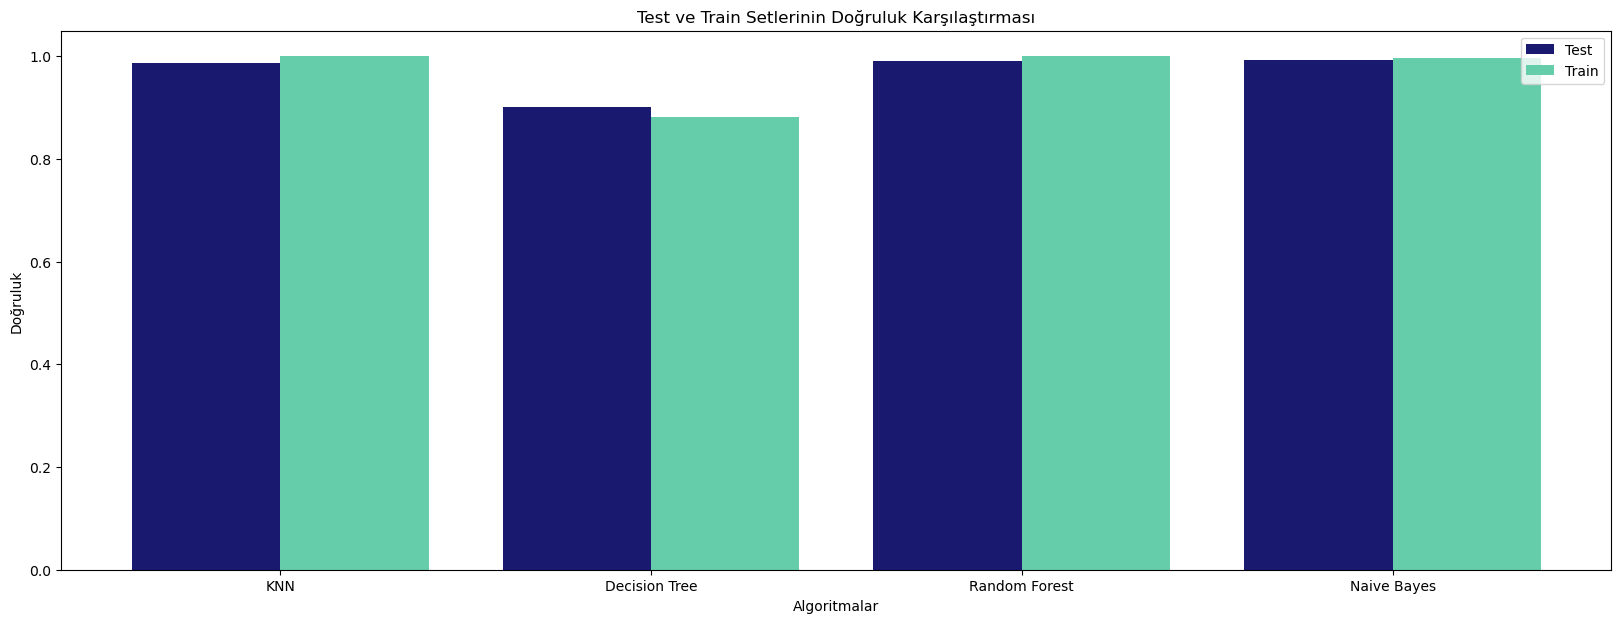

In [52]:
label = ['KNN', 'Decision Tree','Random Forest','Naive Bayes']
Test = [knn_test_accuracy, dt_test_accuracy,rf_test_accuracy,
        nb_test_accuracy]
Train = [knn_train_accuracy,  dt_train_accuracy, rf_train_accuracy,
         nb_train_accuracy]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, label)
plt.xlabel("Algoritmalar")
plt.ylabel("Doğruluk")
plt.title("Test ve Train Setlerinin Doğruluk Karşılaştırması")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()

# Orjinal Data Set İle Eğitilen Modelin Karşılaştırılması 

İşlem görmüş veri seti ile orjinal veri setinin Naive Bayes algoritması üzerinden doğruluk karşılaştırılması.

In [53]:
#orijinal veri setinin alınması
original_df = pd.read_csv("VA_20_033_21_014VeriSeti.csv")

In [54]:
original_df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**Orijinal veri setinin hazırlanması**

In [55]:
features = original_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = imputed_df['label']

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

In [57]:
NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Doğruluk Oranı: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Doğruluk Oranı:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00 

Eksik veri bulunan işlenmiş data setinde doğruluk değeri 0.9931818181818182'dur.
Orijjinal veri setinde ise aynı algirtmanın sonuncunda doğruluk değeri 0.990909090909091 olarak bulunmuştur.
Bu sonuçlar bize doldurulan değerlerin veri setinin normal dağılımına daha yakınlaşmış olduğunu göstermektedir. Bu sebeple işlenmiş veri seti ile daha yüksek doğruluk elde etmektedir.